       0.799_0.201  0.400_0.600  0.600_0.400  0.501_0.499  0.400_0.600
count    25.000000    25.000000    25.000000    25.000000    25.000000
mean    -62.964800  -202.340000  -131.463200  -166.317600  -202.340000
std      27.400565    75.130934    53.683134    64.778318    75.130934
min     -93.290000  -274.270000  -183.330000  -224.730000  -274.270000
25%     -78.290000  -264.810000  -174.740000  -215.400000  -264.810000
50%     -67.290000  -232.820000  -152.730000  -200.890000  -232.820000
75%     -65.950000  -170.520000  -114.960000  -139.180000  -170.520000
max      -9.690000   -54.890000   -24.640000   -38.620000   -54.890000
(25, 5)

- Cluster centers:
[[-0.26709351 -0.24429749 -0.25530542 -0.24667806 -0.24429749]
 [-0.03658175 -0.06693464 -0.04989438 -0.05873159 -0.06693464]
 [-0.19668825 -0.16236712 -0.16876006 -0.16119167 -0.16236712]
 [-0.22601209 -0.21772985 -0.23944611 -0.22768658 -0.21772985]
 [-0.19349758 -0.2484124  -0.21503849 -0.23999329 -0.2484124 ]]


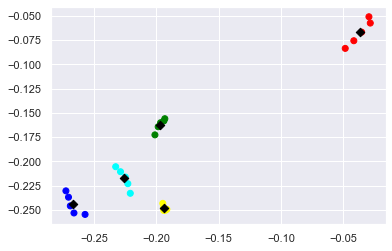

In [32]:
## import the packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans

## ler os dados
df = pd.read_csv('QCM3.csv', sep=';')



## selecionar os dados e normalizar
from sklearn.preprocessing import normalize

#colL = ["Distance from Residence to Work", "Age"]
colL = ["0.799_0.201","0.400_0.600","0.600_0.400","0.501_0.499","0.400_0.600"]
#colL = df.columns
print(df[colL].describe())
X1 = df[colL].to_numpy()
print(X1.shape)
X = normalize(X1,axis=0)
#X=X1

## preparar o modelo (escolher o k)
K = 5
model = KMeans(n_clusters=K, random_state=0, init="k-means++")
model.fit(X)

## testar a escolha do k
print(); print("- Cluster centers:")
print(model.cluster_centers_)

## Mostrar os dados
if (len(colL)==5):
    colors = ["blue","red","green",'cyan','yellow']
    V1 = [v[0] for v in X]
    V2 = [v[1] for v in X]
    VC = [colors[i] for i in model.labels_]
    C1 = [v[0] for v in model.cluster_centers_]
    C2 = [v[1] for v in model.cluster_centers_]
    plt.scatter(V1,V2,c=VC)
    plt.scatter(C1,C2,c="black", marker="D")

Text(0, 0.5, 'Distortion')

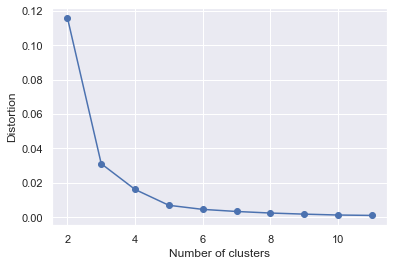

In [33]:
distortions = []
R = range(2, 12)
for K in R:
    model = KMeans(n_clusters=K, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)

plt.plot(R, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')